# ML opdracht 6

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ML-les-2" data-toc-modified-id="ML-les-2-1">ML les 2</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1">Dataset</a></span></li><li><span><a href="#Analyse-Probleem" data-toc-modified-id="Analyse-Probleem-1.2">Analyse Probleem</a></span><ul class="toc-item"><li><span><a href="#Wat-is-het-probleem" data-toc-modified-id="Wat-is-het-probleem-1.2.1">Wat is het probleem</a></span></li><li><span><a href="#Dimensie-dataset" data-toc-modified-id="Dimensie-dataset-1.2.2">Dimensie dataset</a></span></li><li><span><a href="#Soorten-data/features" data-toc-modified-id="Soorten-data/features-1.2.3">Soorten data/features</a></span></li></ul></li><li><span><a href="#Voorspelling" data-toc-modified-id="Voorspelling-1.3">Voorspelling</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-zal-het-beste-zijn-en-waarom?" data-toc-modified-id="Welke-classifier-zal-het-beste-zijn-en-waarom?-1.3.1">Welke classifier zal het beste zijn en waarom?</a></span></li><li><span><a href="#Welke-hyperparameters-zijn-relevant-en-waarom?" data-toc-modified-id="Welke-hyperparameters-zijn-relevant-en-waarom?-1.3.2">Welke hyperparameters zijn relevant en waarom?</a></span></li></ul></li><li><span><a href="#Methoden" data-toc-modified-id="Methoden-1.4">Methoden</a></span><ul class="toc-item"><li><span><a href="#Welke-preprocessing-stappen-zijn-nodig?" data-toc-modified-id="Welke-preprocessing-stappen-zijn-nodig?-1.4.1">Welke preprocessing stappen zijn nodig?</a></span></li><li><span><a href="#Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)" data-toc-modified-id="Welke-classifiers-ga-je-vergelijken?-(Minimaal-2-per-dataset)-1.4.2">Welke classifiers ga je vergelijken? (Minimaal 2 per dataset)</a></span></li><li><span><a href="#Welke-performance-metric-is-passend?" data-toc-modified-id="Welke-performance-metric-is-passend?-1.4.3">Welke performance metric is passend?</a></span></li></ul></li><li><span><a href="#Resultaten" data-toc-modified-id="Resultaten-1.5">Resultaten</a></span><ul class="toc-item"><li><span><a href="#Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!" data-toc-modified-id="Let-op:-Niet-alleen-beste-resultaat-geven,-het-gaat-juist-ook-om-de-vergelijking/verbetering!-1.5.1">Let op: Niet alleen beste resultaat geven, het gaat juist ook om de vergelijking/verbetering!</a></span></li><li><span><a href="#Minimaal-1-visualisatie/plotje-per-dataset." data-toc-modified-id="Minimaal-1-visualisatie/plotje-per-dataset.-1.5.2">Minimaal 1 visualisatie/plotje per dataset.</a></span></li></ul></li><li><span><a href="#Evaluatie/conclusie" data-toc-modified-id="Evaluatie/conclusie-1.6">Evaluatie/conclusie</a></span><ul class="toc-item"><li><span><a href="#Welke-classifier-leverde-beste-resultaat-op?" data-toc-modified-id="Welke-classifier-leverde-beste-resultaat-op?-1.6.1">Welke classifier leverde beste resultaat op?</a></span></li><li><span><a href="#Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?" data-toc-modified-id="Klopt-dit-met-je-voorspelling?-Waarom-wel/niet?-1.6.2">Klopt dit met je voorspelling? Waarom wel/niet?</a></span></li></ul></li><li><span><a href="#Literatuurverwijzingen" data-toc-modified-id="Literatuurverwijzingen-1.7">Literatuurverwijzingen</a></span></li></ul></li></ul></div>

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset
Het doel is om de goede diagnose te stellen tussen een gevaarlijke verspreidende tumor of een niet gevaarlijke tumor.
Deze dataset heeft veel verschillende gevallen van

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.optimizer_v2.adam import Adam

data = pd.read_csv("breast_cancer_dataset.csv")

### Dimensie dataset

In [23]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
data.shape


(569, 33)

### Soorten data/features
Gegeven informatie uit de dataset.
Attribute Information:

1) ID number<br/>
2) Diagnosis (M = malignant, B = benign)<br/>
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)<br/>
b) texture (standard deviation of gray-scale values)<br/>
c) perimeter<br/>
d) area<br/>
e) smoothness (local variation in radius lengths)<br/>
f) compactness (perimeter^2 / area - 1.0)<br/>
g) concavity (severity of concave portions of the contour)<br/>
h) concave points (number of concave portions of the contour)<br/>
i) symmetry<br/>
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.
All feature values are recoded with four significant digits.


## Voorspelling
Vanwege de nabije plots is het misschien handig

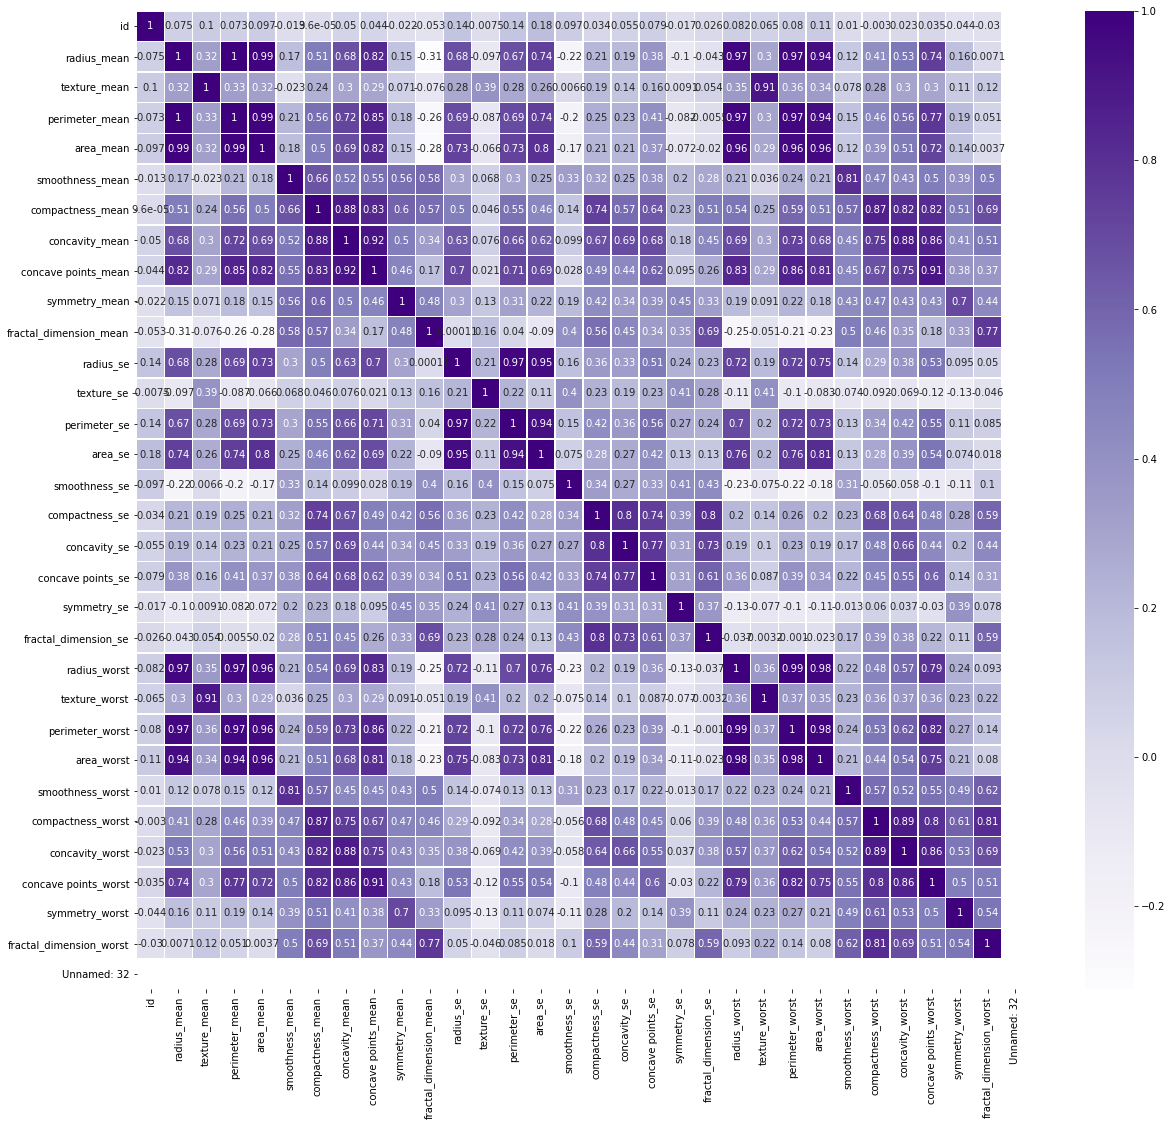

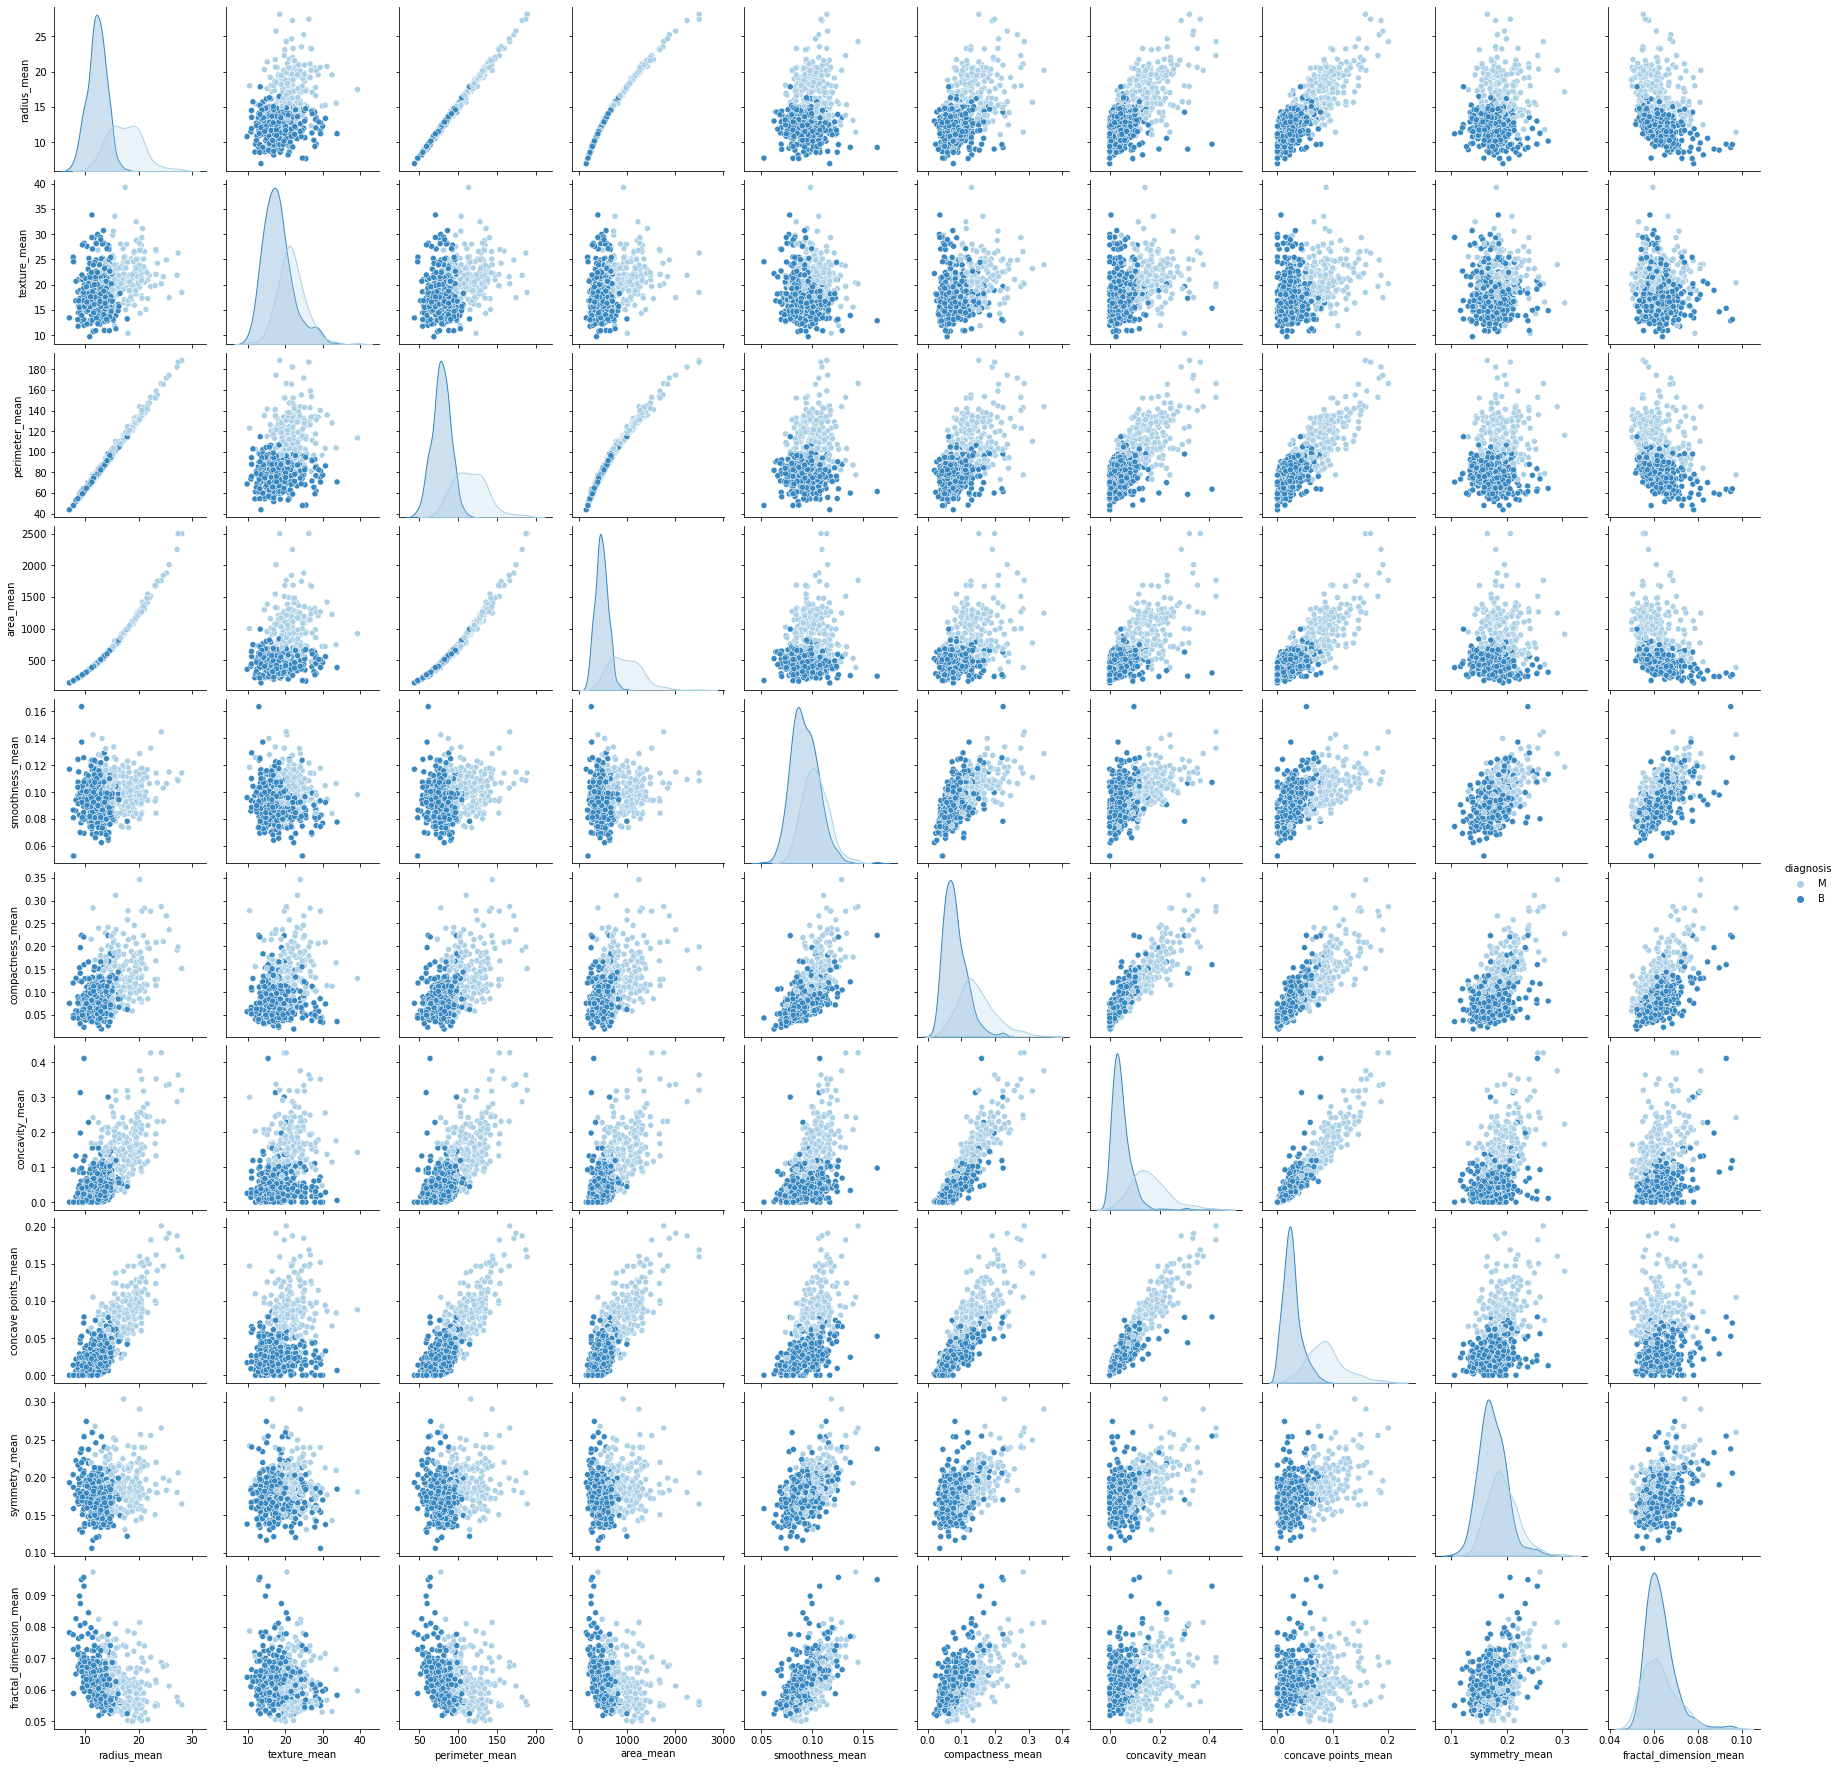

In [25]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap="Purples")

# pairplot for mean columns
sns.pairplot(data[['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']],hue = 'diagnosis', palette='Blues');

## Methoden

### Welke preprocessing stappen zijn nodig?


In [26]:
le = LabelEncoder()
sc = StandardScaler()

data = data.drop(columns={"Unnamed: 32"})
x_data = sc.fit_transform(data.drop(columns={"diagnosis","id"}))
y_data = le.fit_transform(data["diagnosis"])

### Classifier
Ik ga een Dense neural network vergelijken met een KNN
Ik gebruik hier de knn uit simpelheid om te vergelijken tegenover de dense neural network.

### Welke performance metric is passend?
Ik denk dat een accuracy score genoeg is voor deze data. Omdat het een binaire uitkomst is. Voor de knn hetzelfde, hier
gebruik ik de score functie die is ingebouwd.

### Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, random_state=3)

model = Sequential()

model.add(Dense(15, activation='relu', input_dim=30))
model.add(Dense(6,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train, epochs=50, batch_size=50)
y_pred=model.predict(X_test)
# Zet om naar een 1/0 antwoord
y_pred = (y_pred>0.5)

accuracy_score(y_test,y_pred)


Epoch 1/50
9/9 [==============================] - 1s 4ms/step - loss: 0.7074 - accuracy: 0.6601
Epoch 2/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2454 - accuracy: 0.9412
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9678
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0703 - accuracy: 0.9788
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9854
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.0404 - accuracy: 0.9831

0.972027972027972

In [28]:
otherKNN = KNeighborsClassifier(n_neighbors=2)
otherKNN.fit(X_train, y_train)
print(otherKNN.score(X_test, y_test))


0.965034965034965


## Resultaten
De resultaten waren in het begin niet goed. De hoeveelheid neuronen die waren gebruikt was eerst gelijk aan de
hoeveelheid features. Hierna ben ik overgegaan naar een kleiner getal en het veranderen van de optimizer. Hierdoor had
ik al een verhoging van 0.10. Tot slot is de adam methode aangepast naar een lagere waarde. Dit bleek goed te helpen.

Naast het gebruik van een neuraal netwerk heb ik knn voor de simpelheid gebruikt. Hieruit wordt getoond dat de
resultaten heel dicht bij elkaar zitten. Hierdoor heb ik het gevoel dat je beter een simpelere algorithme kan gebruiken
in plaats van een neuraal netwerk.

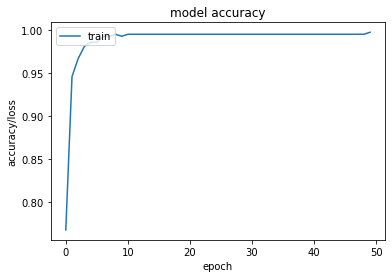

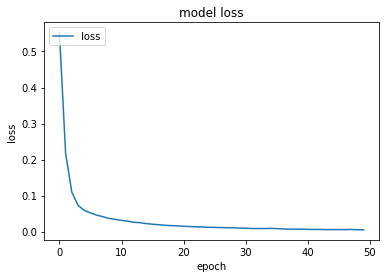

In [29]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

<AxesSubplot:>

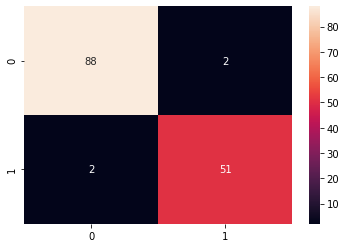

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True)

### Confusion matrix
Aan de waarden van de confusion matrix kan je zien dat de foute geschatte waarden niet extreem naar links/rechts gaan
Dit duid op een goed model die geen grote bias heeft voor de verschillende waardes.

## Evaluatie/conclusie

### Welke classifier leverde beste resultaat op?
Beiden classifiers hebben bijna hetzelfde resultaat.
Ik had dit wel redelijk verwacht. Wat ik niet verwacht had was dat het knn model zo accuraat zou zijn met 2 neighbours.
Maar uit meerdere tests is dit wel gebleken. Daarnaast denk ik dat het qua rekenkracht toch het beste KNN kan gebruiken.
Het trainen en de complexiteit van de Dense neural network is veel te lastig voor deze oplossing en er zijn classifiers
die veel betere waarden kunnen krijgen. Daarnaast kunnen er ook nog unsupervised learning model gebruiken om de clusters
te onderscheiden.

## Literatuurverwijzingen

Dataset:
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv